In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
import matplotlib.patches as patches
import matplotlib.ticker as mtick
import seaborn as sns

from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)

In [2]:
sns.set(rc={'figure.figsize':(16,9)})

In [3]:
df = pd.read_csv("twice_korean_singles_lines.csv")

In [4]:
df

,start_time,end_time,lyric,vocal1,vocal2,duration,song_name,song_year
0,"00:00:13,293","00:00:15,108",modu nareul gajigo,Nayeon,NaN,1.815,LikeOohAhh,2015
1,"00:00:15,108","00:00:16,687",maeil gaman an dujo,Nayeon,NaN,1.579,LikeOohAhh,2015
2,"00:00:16,687","00:00:18,327",naega neomu yeppeujo,Momo,NaN,1.640,LikeOohAhh,2015
3,"00:00:18,327","00:00:20,116",na ttaemune da himdeuljo,Momo,NaN,1.789,LikeOohAhh,2015
4,"00:00:20,116","00:00:21,705",eodil geotgo isseodo,Nayeon,NaN,1.589,LikeOohAhh,2015
...,...,...,...,...,...,...,...,...
1063,"00:02:39,787","00:02:41,790",geurae banggeum geu mal,Jeongyeon,NaN,2.003,TalkThatTalk,2022
1064,"00:02:41,790","00:02:44,500",Talk that talk ttak han madi,Tzuyu,NaN,2.710,TalkThatTalk,2022
1065,"00:02:44,500","00:02:46,569",Talk that talk L-O-V-E,Tzuyu,NaN,2.069,TalkThatTalk,2022
1066,"00:02:46,569","00:02:48,011",deullyeojweo Ooh,Nayeon,NaN,1.442,TalkThatTalk,2022


We will only be using the vocal1 (lead vocals), duration, song_name, and song_year for this analysis.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   start_time  1068 non-null   object 
 1   end_time    1068 non-null   object 
 2   lyric       1068 non-null   object 
 3   vocal1      1068 non-null   object 
 4   vocal2      85 non-null     object 
 5   duration    1068 non-null   float64
 6   song_name   1068 non-null   object 
 7   song_year   1068 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 66.9+ KB


Excepting vocal2, which we are not using anyways, we have a complete dataset.  That's great, as it eliminates the need for cleaning as such.

## Manipulating Original Dataset into Percent of each year for Line Chart

In [6]:
df_a = df.groupby(['vocal1', 'song_year']).duration.sum().reset_index()

In [7]:
df_a

,vocal1,song_year,duration
0,Chaeyoung,2015,8.508
1,Chaeyoung,2016,20.097
2,Chaeyoung,2017,60.576
3,Chaeyoung,2018,28.080
4,Chaeyoung,2019,38.490
...,...,...,...
67,Tzuyu,2018,57.661
68,Tzuyu,2019,33.706
69,Tzuyu,2020,34.671
70,Tzuyu,2021,45.514


We have the time each idol spent singing each year, now we need to put this into terms of a fraction of the total time for that year.

In [8]:
df_year_totals = pd.DataFrame(df_a.groupby('song_year').duration.sum()).reset_index()

In [9]:
df_year_totals

,song_year,duration
0,2015,168.594
1,2016,331.031
2,2017,662.053
3,2018,486.623
4,2019,360.481
5,2020,477.135
6,2021,372.850
7,2022,159.205


Hmm, this is an interesting chart in its own right.  Their singles' lengths peaked in 2017, rising rapidly before then and declining to below their 2015-levels.  Admittedly, this is a partial year, but still - looks like their popularity peaked in 2017.

In [10]:
df_a = df_a.merge(df_year_totals, on='song_year')

In [11]:
df_a

,vocal1,song_year,duration_x,duration_y
0,Chaeyoung,2015,8.508,168.594
1,Dahyun,2015,4.958,168.594
2,Jeongyeon,2015,12.896,168.594
3,Jihyo,2015,55.228,168.594
4,Mina,2015,17.024,168.594
...,...,...,...,...
67,Mina,2022,17.465,159.205
68,Momo,2022,10.598,159.205
69,Nayeon,2022,27.374,159.205
70,Sana,2022,16.408,159.205


In [12]:
df_a['fraction'] = df_a['duration_x'] / df_a['duration_y']

In [13]:
df_a

,vocal1,song_year,duration_x,duration_y,fraction
0,Chaeyoung,2015,8.508,168.594,0.050464
1,Dahyun,2015,4.958,168.594,0.029408
2,Jeongyeon,2015,12.896,168.594,0.076491
3,Jihyo,2015,55.228,168.594,0.327580
4,Mina,2015,17.024,168.594,0.100976
...,...,...,...,...,...
67,Mina,2022,17.465,159.205,0.109701
68,Momo,2022,10.598,159.205,0.066568
69,Nayeon,2022,27.374,159.205,0.171942
70,Sana,2022,16.408,159.205,0.103062


In [14]:
df_a.rename(columns={'song_year':'Year'}, inplace=True)
df_a.rename(columns={'fraction':'Time Spent Singing'}, inplace=True)

df_a['Time Spent Singing'] = df_a['Time Spent Singing'] * 100

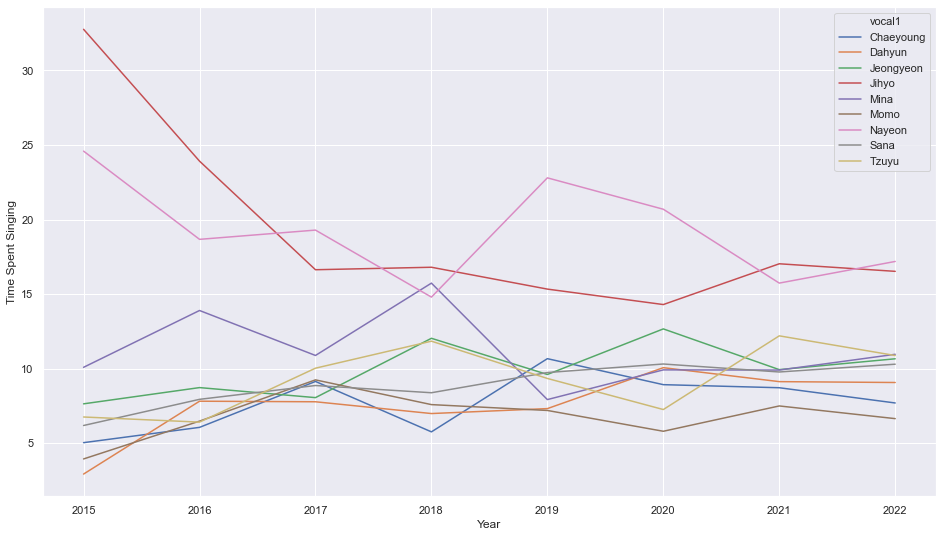

In [15]:
sns.lineplot(data=df_a, x='Year', y='Time Spent Singing', hue='vocal1')
plt.show()

## Preparing Yearly Popularity Bar Chart Data

In [16]:
#reading dataset

kpop2015 = pd.read_csv('KPopHits2015.csv')
kpop2016 = pd.read_csv('KPopHits2016.csv')
kpop2017 = pd.read_csv('KPopHits2017.csv')
kpop2018 = pd.read_csv('KPopHits2018.csv')
kpop2019 = pd.read_csv('KPopHits2019.csv')
kpop2020 = pd.read_csv('KPopHits2020.csv')
kpop2021 = pd.read_csv('KPopHits2021.csv')

dfs = [kpop2015, kpop2016, kpop2017, kpop2018, kpop2019, kpop2020, kpop2021]

In [17]:
#changing the column name from artist/s to artists for easy reading

for year_df in dfs:
    year_df.rename(columns={"artist/s" : "artists"}, inplace=True)

In [18]:
kpop2015[kpop2015['artists']=='TWICE'].shape[0]

0

Twice didn't appear on 2015 hit charts top 20

In [19]:
kpop2016[kpop2016['artists']=='TWICE'].shape[0]

1

In [20]:
kpop2017[kpop2017['artists']=='TWICE'].shape[0]

2

In [21]:
kpop2018[kpop2018['artists']=='TWICE'].shape[0]

3

In [22]:
kpop2019[kpop2019['artists']=='TWICE'].shape[0]

2

In [23]:
kpop2020[kpop2020['artists']=='TWICE'].shape[0]

5

In [24]:
kpop2021[kpop2021['artists']=='TWICE'].shape[0]

3

The dataset we listed did not have a figure for 2022, but I was able to look this up manually on spotify.  Since we are almost in December, the figure is unlikely to change before the year's end.

In [25]:
finalDF = pd.DataFrame({'YEAR':range(2015,2023,1),
                       'hits':[0,1,2,3,2,5,3,1]}
)

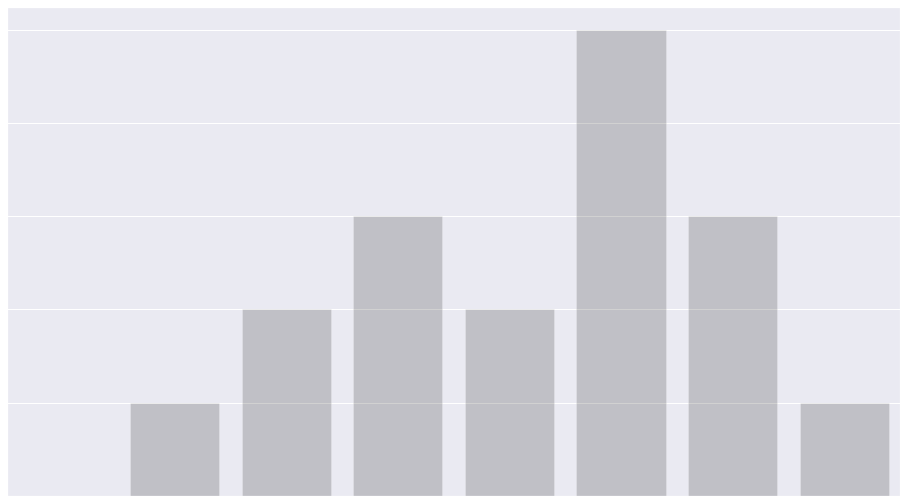

In [26]:
fig, ax = plt.subplots(figsize = (16, 9))
fig1 = sns.barplot(data=finalDF, x='YEAR', y='hits', color='k', alpha=.2)
fig1.set(xticklabels=[])
fig1.set(yticklabels=[])
fig1.set(title=None)
fig1.set(xlabel=None)
fig1.set(ylabel=None)
plt.savefig('popularity_chart.png', bbox_inches='tight')
plt.show()

## Importing Images of Group Members

In [27]:
jihyo = image.imread('jihyo.jpg')
momo = image.imread('momo.jpg')
chaeyoung = image.imread('chaeyoung.jpg')
jeongyeon = image.imread('jeongyeon.jpg')

## Assembling Final Figure

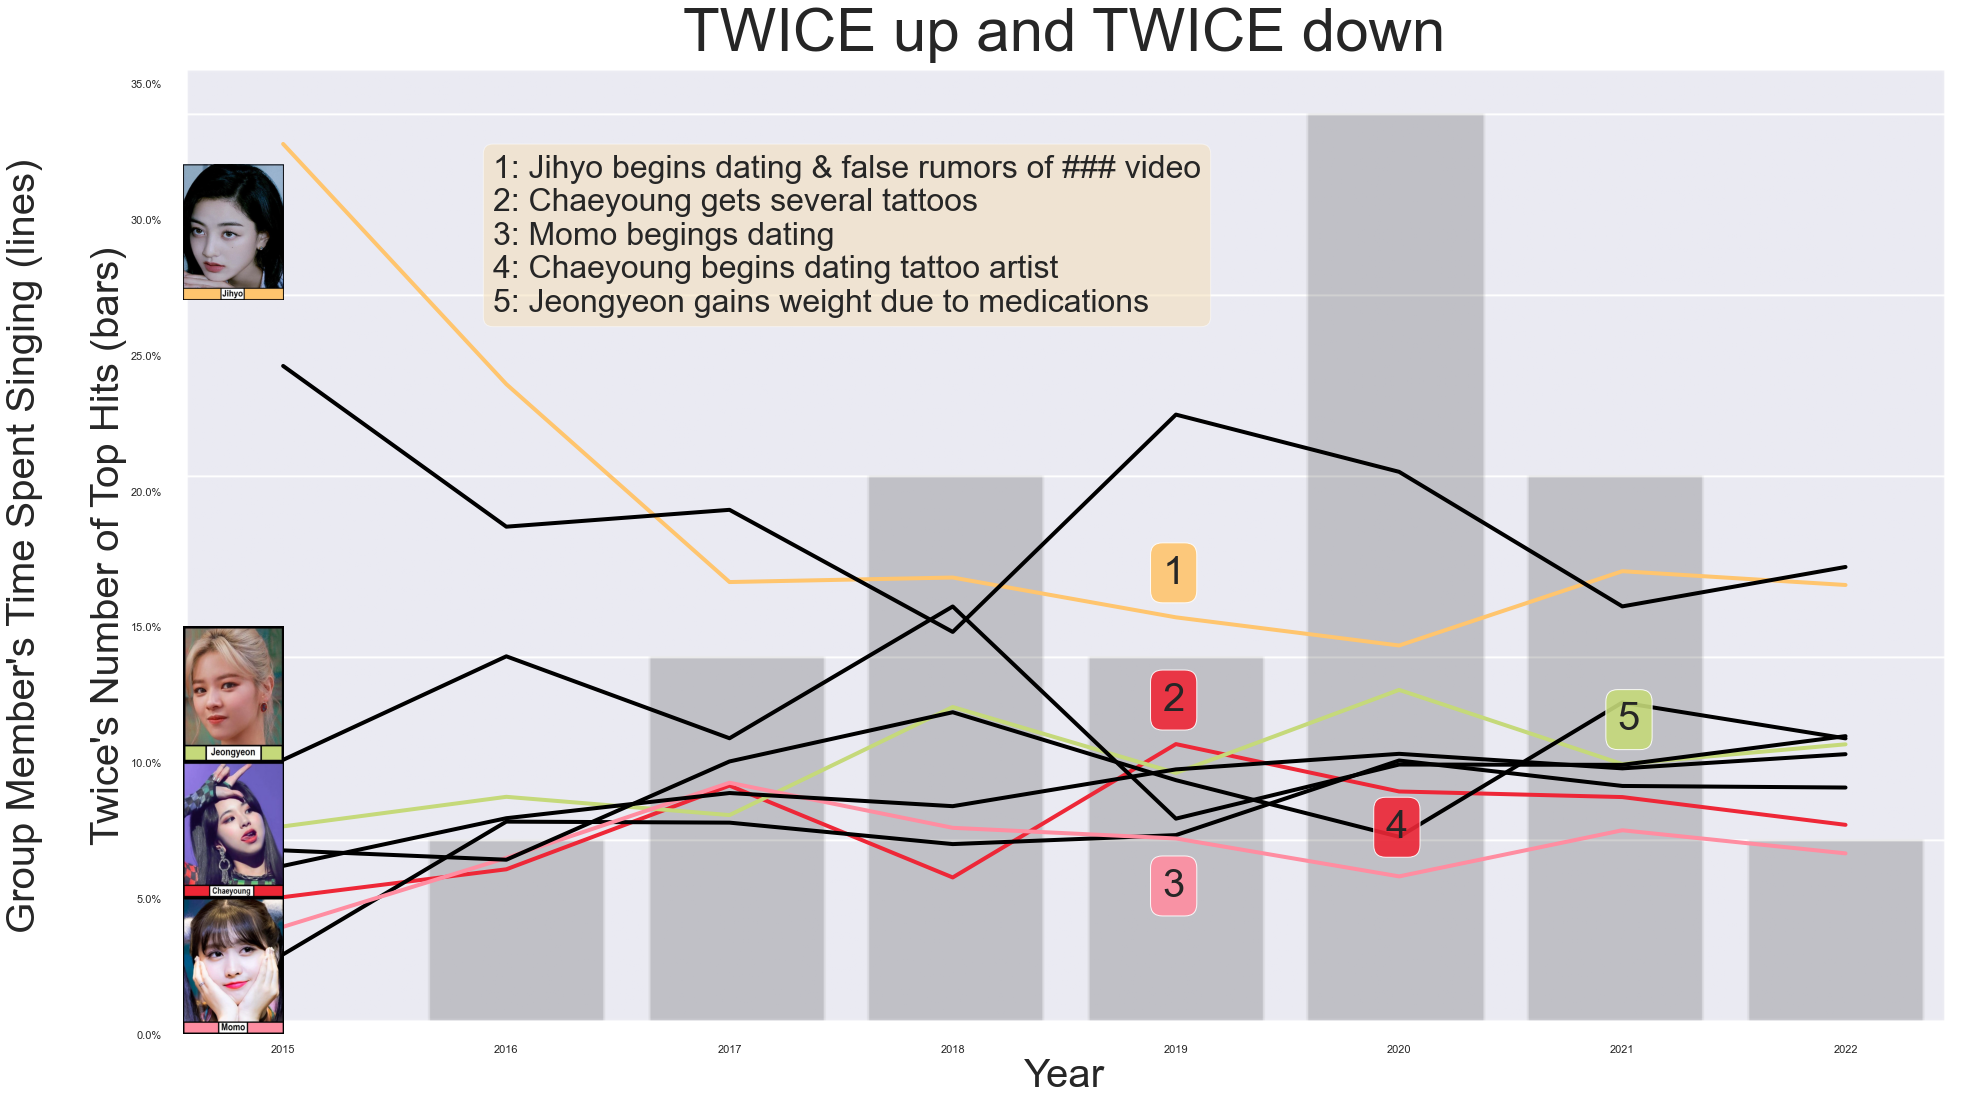

In [28]:
fig, ax = plt.subplots(figsize = (32,18))
plt.xlim(2014.5, 2022.5)
plt.ylim(0, 36)
ax.grid(False)



# Adding the Lineplot
sns.lineplot(data=df_a, x='Year', y='Time Spent Singing', hue='vocal1', linewidth = 4.0, ax=ax, zorder=1, legend=False,
             palette=["#ee2737", "#000000", "#c5d97a", "#ffc56e", "#000000", "#ff8da1", "#000000", "#000000", "#000000"])


# Customized Legend for Readability
#plt.legend(title='Idol', loc='upper right', labels=['Jihyo', 'Jeongyeon', 'Chaeyoung', 'Momo'], labelcolor=['#ffc56e', '#c5d97a', '#ee2737', '#ff8da1'])


# Adding the popularity Chart

#ax=sns.barplot(data=finalDF, x='YEAR', y='hits', color='k', alpha=.5, ax=ax, zorder=1)
background = image.imread("popularity_chart.png")
ax.imshow(background, extent=[2014.5,2022.5,0,36], aspect='auto', zorder=0)

# Add Rectangle to block out less-featured members
#rect = patches.Rectangle((2015, 0), 8, .12, linewidth=1, edgecolor='k', facecolor='k', fill=True, alpha=1, zorder=2)
#ax.add_patch(rect)


# Add face images to Viz
ax.imshow(jihyo, extent=[2014.55, 2015, 27, 32], aspect='auto', zorder=3)
ax.imshow(jeongyeon, extent=[2014.55, 2015, 10, 15], aspect='auto', zorder=3)
ax.imshow(chaeyoung, extent=[2014.55, 2015, 5, 10], aspect='auto', zorder=3)
ax.imshow(momo, extent=[2014.55, 2015, 0, 5], aspect='auto', zorder=3)



# Add Event Number Labels

Chaeyoungnumberbox = dict(boxstyle='round', facecolor='#ee2737', alpha=0.9)
Jihyonumberbox = dict(boxstyle='round', facecolor='#ffc56e', alpha=0.9)
Momonumberbox = dict(boxstyle='round', facecolor='#ff8da1', alpha=0.9)
Jeongyeonnumberbox = dict(boxstyle='round', facecolor='#c5d97a', alpha=0.9)

ax.text(0.555, 0.49, "1", transform=ax.transAxes, fontsize=40, verticalalignment='top', bbox=Jihyonumberbox)
ax.text(0.555, 0.36, "2", transform=ax.transAxes, fontsize=40, verticalalignment='top', bbox=Chaeyoungnumberbox)
ax.text(0.555, 0.17, "3", transform=ax.transAxes, fontsize=40, verticalalignment='top', bbox=Momonumberbox)
ax.text(0.680, 0.23, "4", transform=ax.transAxes, fontsize=40, verticalalignment='top', bbox=Chaeyoungnumberbox)
ax.text(0.810, 0.34, "5", transform=ax.transAxes, fontsize=40, verticalalignment='top', bbox=Jeongyeonnumberbox)

# Add Event Description Labels

descriptionbox = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

descriptions = "1: Jihyo begins dating & false rumors of ### video\n"+\
               "2: Chaeyoung gets several tattoos\n"+\
               "3: Momo begings dating \n"+\
               "4: Chaeyoung begins dating tattoo artist\n"+\
               "5: Jeongyeon gains weight due to medications"

ax.text(0.18, 0.9, descriptions, transform=ax.transAxes, fontsize=32, verticalalignment='top', bbox=descriptionbox)


# Formatting Axes

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_xlabel("Year", fontsize=40)
ax.set_ylabel("Group Member's Time Spent Singing (lines)\n\nTwice's Number of Top Hits (bars)", fontsize=40)



# Title

ax.set_title("TWICE up and TWICE down", fontsize=60)



plt.savefig('final_figure.png', bbox_inches='tight')
plt.show()

In [29]:
df_a

,vocal1,Year,duration_x,duration_y,Time Spent Singing
0,Chaeyoung,2015,8.508,168.594,5.046443
1,Dahyun,2015,4.958,168.594,2.940793
2,Jeongyeon,2015,12.896,168.594,7.649145
3,Jihyo,2015,55.228,168.594,32.757987
4,Mina,2015,17.024,168.594,10.097631
...,...,...,...,...,...
67,Mina,2022,17.465,159.205,10.970133
68,Momo,2022,10.598,159.205,6.656826
69,Nayeon,2022,27.374,159.205,17.194184
70,Sana,2022,16.408,159.205,10.306209
